In [1]:
from IPython.display import display, Markdown

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as skm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from ISLP import load_data, confusion_table

# New imports
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay


roc_curve = RocCurveDisplay.from_estimator

# Support Vector Classifier

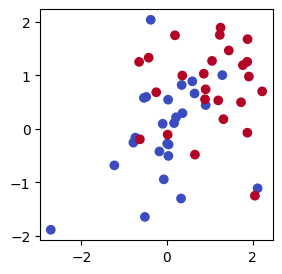

In [2]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1] * 25 + [1] * 25)
X[y==1] += 1
fig = plt.figure(figsize=(3, 3)); ax = fig.add_subplot()
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.coolwarm)

In [3]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

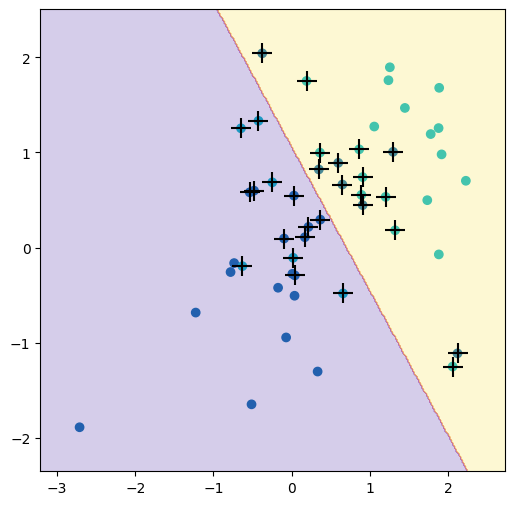

In [4]:
fig = plt.figure(figsize=(6, 6)); ax = fig.add_subplot()
plot_svm(X,
         y,
         svm_linear,
         ax=ax)

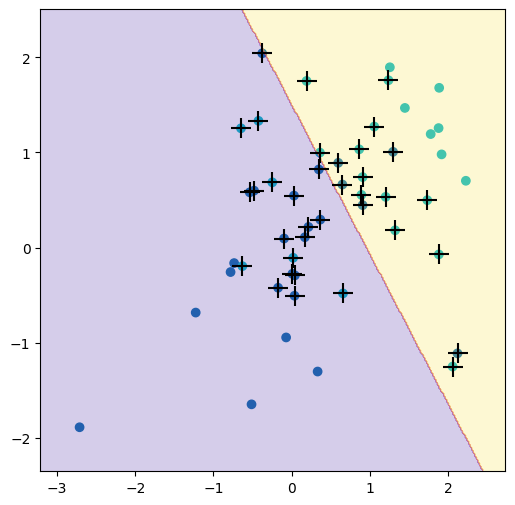

In [5]:
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)
fig = plt.figure(figsize=(6, 6)); ax = fig.add_subplot()
plot_svm(X,
         y,
         svm_linear_small,
         ax=ax)

From book page 387: When the cost argument is small, then the margins will be
wide and many support vectors will be on the margin or will violate the
margin.

From book page 376: Conversely, as C
decreases, we become less tolerant of violations to the margin and so the
margin narrows. 

IDK what to believe anymore.

In [6]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [7]:
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_linear,
                        {'C': [0.001, 0.01, 0.1, 1, 1.5, 10, 100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 1}

In [8]:
grid.cv_results_['mean_test_score']

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

In [9]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1]*10+[1]*10)
X_test[y_test==1] += 1

In [10]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


In [11]:
svm_ = SVC(C=0.0001,
           kernel='linear').fit(X, y)
y_test_hat = svm_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,2,0
1,8,10


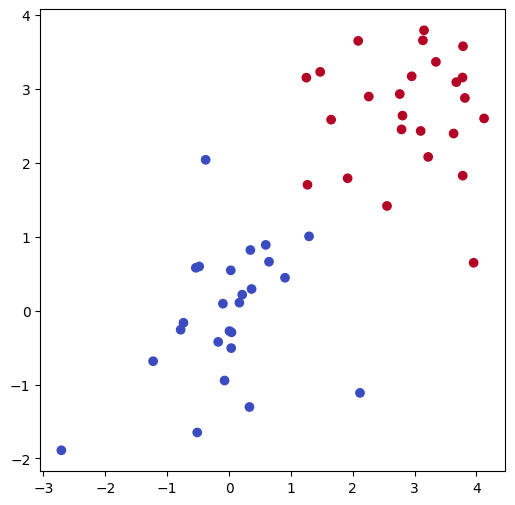

In [12]:
X[y==1] += 1.9
fig = plt.figure(figsize=(6, 6)); ax = fig.add_subplot()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

In [13]:
svm_ = SVC(C=1e5, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


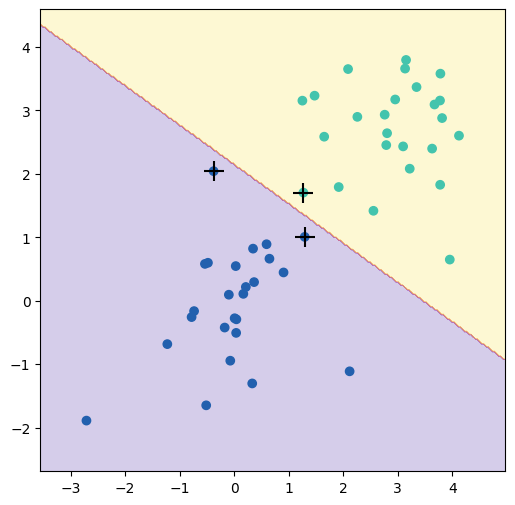

In [14]:
fig = plt.figure(figsize=(6, 6)); ax = fig.add_subplot()
plot_svm(X,y,
         svm_,
         ax=ax)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


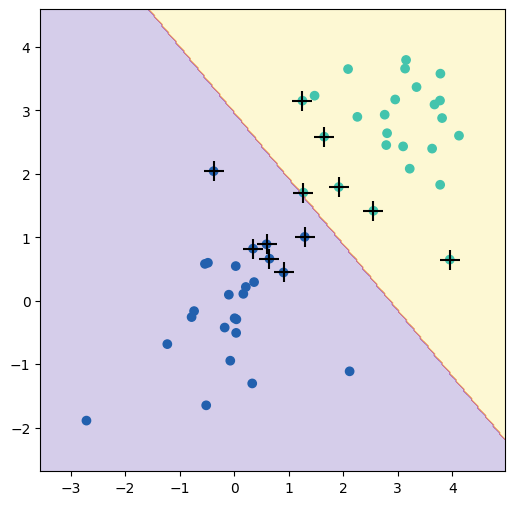

In [15]:
svm_ = SVC(C=0.1, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
display(confusion_table(y_hat, y))
fig = plt.figure(figsize=(6, 6)); ax = fig.add_subplot()
plot_svm(X,y,
         svm_,
         ax=ax)

The more support vectors, the better!

# Support Vector Machine

In [16]:
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

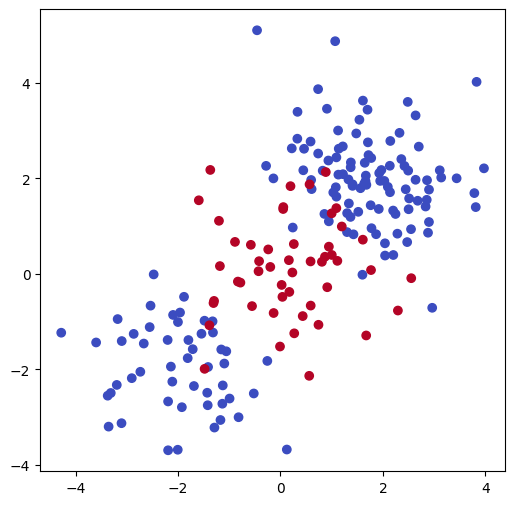

In [17]:
fig = plt.figure(figsize=(6, 6)); ax = fig.add_subplot()
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.coolwarm)

In [18]:
(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                y,
                                test_size=0.5,
                                random_state=0)
svm_rbf = SVC(kernel='rbf', gamma=1, C=1)
svm_rbf.fit(X_train, y_train)

SVC(C=1, gamma=1)

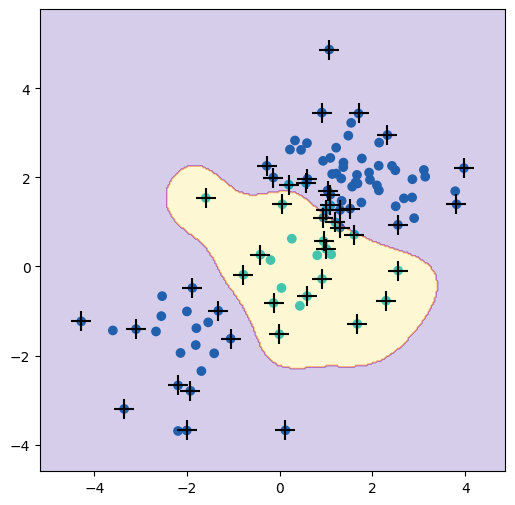

In [19]:
fig = plt.figure(figsize=(6, 6)); ax = fig.add_subplot()
plot_svm(X_train,
         y_train,
         svm_rbf,
         ax=ax)

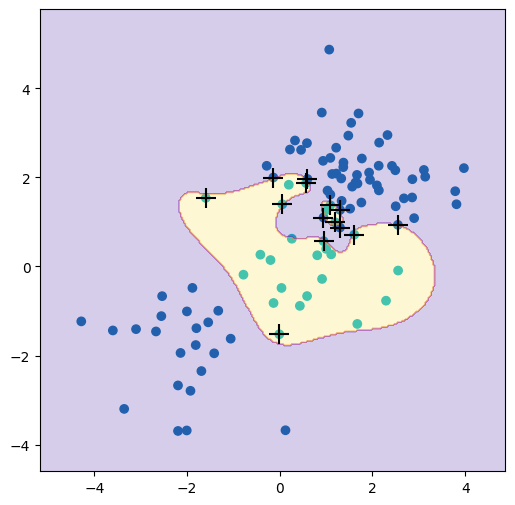

In [20]:
svm_rbf = SVC(kernel='rbf', gamma=1, C=1e5)
svm_rbf.fit(X_train, y_train)
fig = plt.figure(figsize=(6, 6)); ax = fig.add_subplot()
plot_svm(X_train,
         y_train,
         svm_rbf,
         ax=ax)

So, high value of the 'C' parameter means a higher chance to overfit the data.

In [21]:
grid = skm.GridSearchCV(svm_rbf,
                        {'C':[0.1, 1, 10, 100, 1000],
                         'gamma':[0.5, 1, 2, 3, 4]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.5}

Truth,1,2
Predicted,,
1,69,6
2,6,19


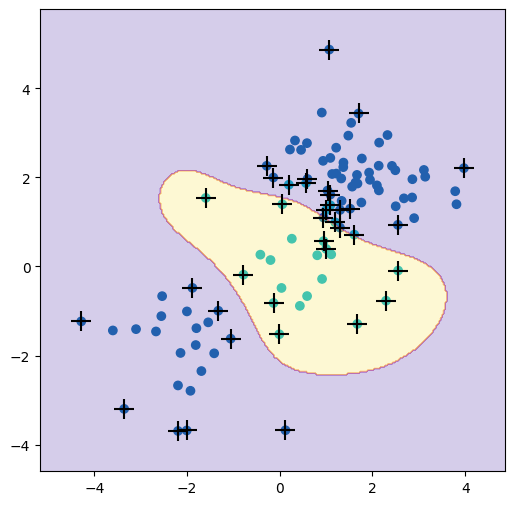

In [22]:
fig = plt.figure(figsize=(6, 6)); ax = fig.add_subplot()
plot_svm(X_train,
         y_train,
         grid.best_estimator_,
         ax=ax)
y_hat_test = grid.best_estimator_.predict(X_test)
confusion_table(y_hat_test, y_test)

# Roc Curves

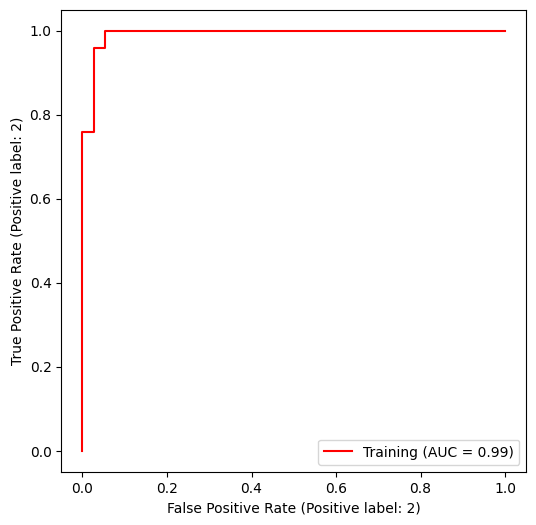

In [23]:
fig = plt.figure(figsize=(6, 6)); ax = fig.add_subplot()
roc_curve(grid.best_estimator_,
          X_train,
          y_train,
          name='Training',
          color='r',
          ax=ax)

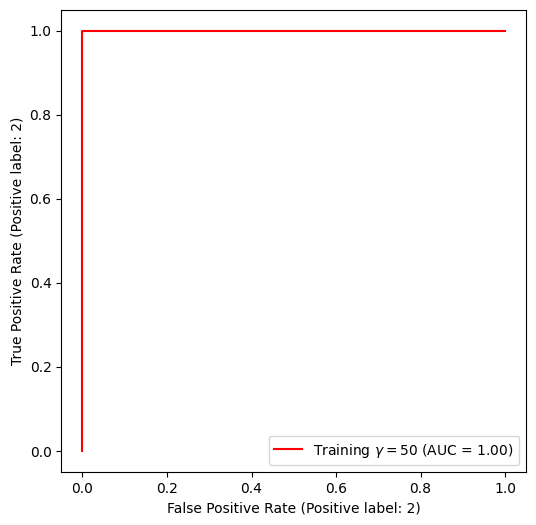

In [24]:
svm_flex = SVC(kernel='rbf',
               gamma=50,
               C=1)
svm_flex.fit(X_train, y_train)
fig = plt.figure(figsize=(6, 6)); ax = fig.add_subplot()
roc_curve(svm_flex,
          X_train,
          y_train,
          name='Training $\gamma=50$',
          color='r',
          ax=ax)

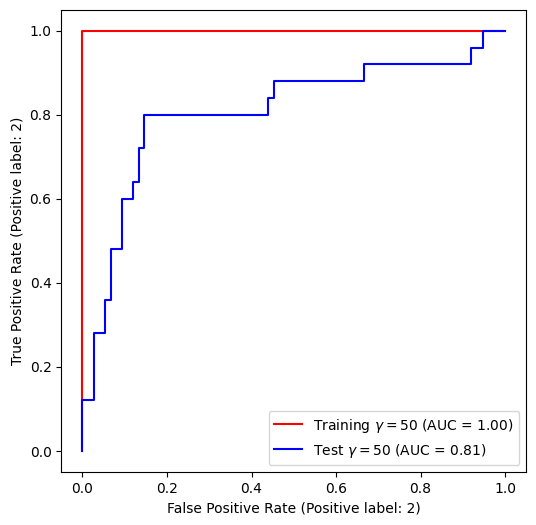

In [25]:
roc_curve(svm_flex,
          X_test,
          y_test,
          name='Test $\gamma=50$',
          color='b',
          ax=ax)
fig

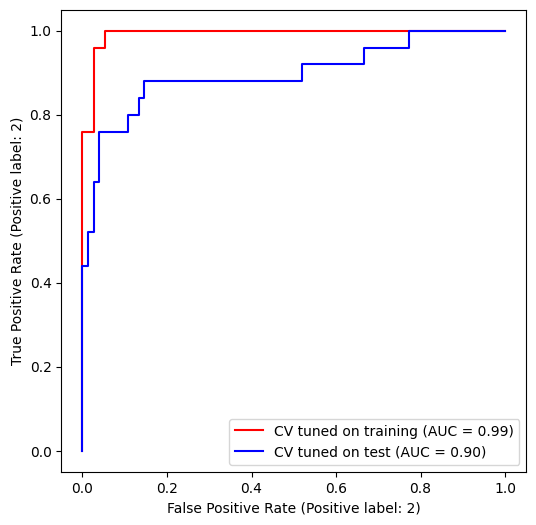

In [26]:
fig = plt.figure(figsize=(6, 6)); ax = fig.add_subplot()
for (X_, y_, c, name) in zip(
    (X_train, X_test),
    (y_train, y_test),
    ('r', 'b'),
    ('CV tuned on training',
     'CV tuned on test')):
    roc_curve(grid.best_estimator_,
              X_,
              y_,
              name=name,
              ax=ax,
              color=c)

# SVM with multiple classes

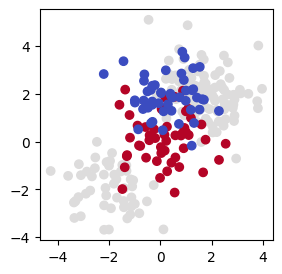

In [27]:
rng = np.random.default_rng(123)
X = np.vstack([X, rng.standard_normal((50, 2))])
y = np.hstack([y, [0]*50])
X[y == 0, 1] += 2
fig = plt.figure(figsize=(3, 3)); ax = fig.add_subplot()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

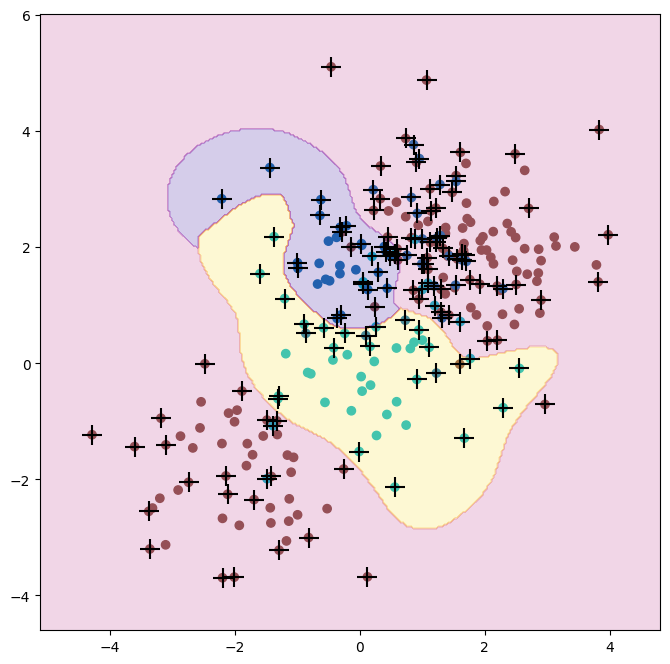

In [28]:
svm_rbf_3 = SVC(kernel='rbf',
                C=10,
                gamma=1,
                decision_function_shape='ovo')
svm_rbf_3.fit(X, y)
fig = plt.figure(figsize=(8, 8)); ax = fig.add_subplot()
plot_svm(X,
         y,
         svm_rbf_3,
         scatter_cmap=plt.cm.tab10,
         ax=ax)

# Application to Gene Expression Data

In [29]:
Khan = load_data('Khan')
Khan['xtrain'].shape, Khan['xtest'].shape

((63, 2308), (20, 2308))

In [30]:
khan_linear = SVC(kernel='linear', C=10)
khan_linear.fit(Khan['xtrain'], Khan['ytrain'])
confusion_table(khan_linear.predict(Khan['xtrain']),
                Khan['ytrain'])

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [31]:
confusion_table(khan_linear.predict(Khan['xtest']),
                Khan['ytest'])

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5


# Exercises

## Conceptual

1. This problem involves hyperplanes in two dimensions.

   (a) Sketch the hyperplane 1+3x1 - x2 = 0. Indicate the set of points for which 1 + 3x1 - x2 > 0, as well as the set of points for which 1 + 3x1 - x2 < 0.

   (b) On the same plot, sketch the hyperplane -2 + $x_1$ + $2x_2$ = 0. Indicate the set of points for which -2 + $x_1$ + $2x_2$ > 0, as well as the set of points for which -2 + $x_1$ + $2x_2$ < 0

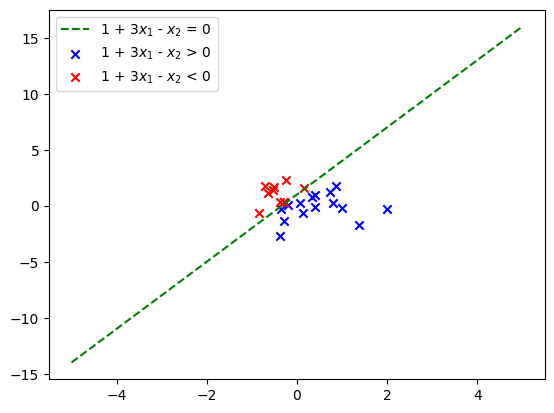

In [32]:
x1 = np.linspace(-5, 5, 1000)
x2 = 1 + 3*x1
fig = plt.figure(); ax = fig.add_subplot()
ax.plot(x1, x2, '--g', label='1 + $3x_1$ - $x_2$ = 0')

points = rng.standard_normal((25,2))
sign = np.where((1 + 3*points[:, 0] - points[:, 1]) > 0, 'positive', 'negative')
ax.scatter(points[:, 0][sign == 'positive'],
           points[:, 1][sign == 'positive'],
           c='b',
           marker='x',
           label='1 + $3x_1$ - $x_2$ > 0')

ax.scatter(points[:, 0][sign == 'negative'],
           points[:, 1][sign == 'negative'],
           c='r',
           marker='x',
           label='1 + $3x_1$ - $x_2$ < 0')

ax.legend()

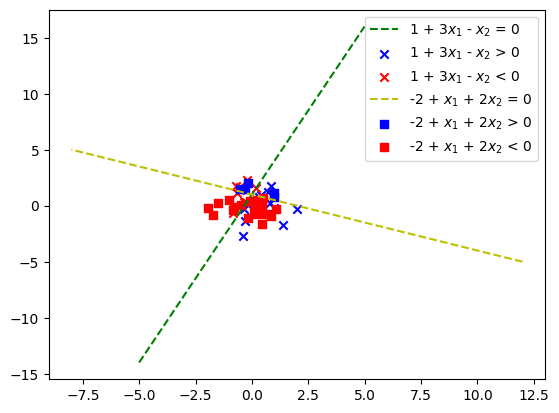

In [33]:
x2 = np.linspace(-5, 5, 1000)
x1 = 2 - 2*x2

ax.plot(x1, x2, '--y', label='-2 + $x_1$ + $2x_2$ = 0')

points = rng.standard_normal((25,2))
sign = np.where((-2 + points[:, 0] + 2*points[:, 1]) > 0, 'positive', 'negative')
ax.scatter(points[:, 0][sign == 'positive'],
           points[:, 1][sign == 'positive'],
           c='b',
           marker='s',
           label='-2 + $x_1$ + $2x_2$ > 0')

ax.scatter(points[:, 0][sign == 'negative'],
           points[:, 1][sign == 'negative'],
           c='r',
           marker='s',
           label='-2 + $x_1$ + $2x_2$ < 0')
ax.legend()
fig

2. We have seen that in p = 2 dimensions, a linear decision boundary takes the form $\beta_0 + \beta_1X_1 + \beta_2X_2 = 0$. We now have to investigate a non-linear decision boundary.

   (a) Sketch the curve
   
   $(1+X_1)^2 + (2-X_2)^2=4$

   https://www.youtube.com/watch?v=u_39J-syjB0

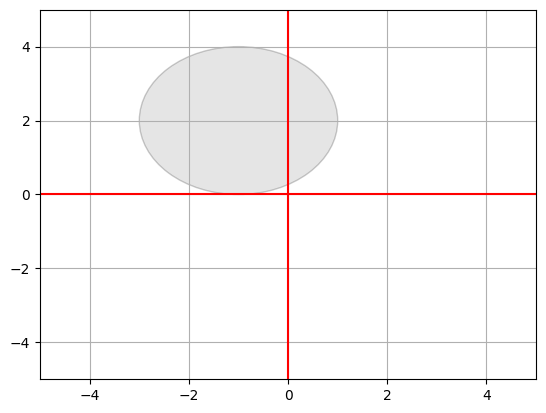

In [34]:
min = -5
max = 5
x1 = np.linspace(min, max, 1000)
x2 = np.linspace(min, max, 1000)
circle = plt.Circle((-1, 2), radius=2, alpha=0.2, ec='black', color='gray')

fig = plt.figure(); ax = fig.add_subplot()
ax.axis([min, max, min, max])
ax.plot([0, 0], [min, max], 'r')
ax.plot([min, max], [0, 0], 'r')
ax.add_patch(circle)

ax.grid(True)

(b) On your sketch, indicate the set of points for which $(1+X_1)^2 + (2-X_2)^2>4$

as well as the set of points for which
$(1+X_1)^2 + (2-X_2)^2<4$

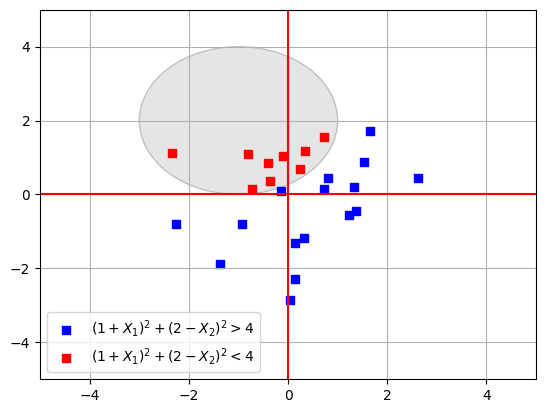

In [35]:
points = rng.standard_normal((25,2))
sign = np.where(((1+points[:, 0])**2+(2-points[:, 1])**2) > 4, 'positive', 'negative')

ax.scatter(points[:, 0][sign == 'positive'],
           points[:, 1][sign == 'positive'],
           c='b',
           marker='s',
           label='$(1+X_1)^2 + (2-X_2)^2>4$')

ax.scatter(points[:, 0][sign == 'negative'],
           points[:, 1][sign == 'negative'],
           c='r',
           marker='s',
           label='$(1+X_1)^2 + (2-X_2)^2<4$')
ax.legend()
fig

(c) Suppose that a classifier assigns an observation to the blue class if 
    $(1+X_1)^2 + (2-X_2)^2>4$

and to the red class otherwise. To what class is the observation (0,0) classified? (-1,1)? (2,2)? (3,8)?

In [36]:
points = np.array([(0, 0), (-1, 1), (2, 2), (3, 8)])
signs = np.where(((1+points[:, 0])**2+(2-points[:, 1])**2) > 4, 'positive', 'negative')

for x1, x2, sign in zip(points[:, 0], points[:, 1], signs):
    print(f'({x1},{x2}) class is {"blue" if sign == "positive" else "red"}')

(0,0) class is blue
(-1,1) class is red
(2,2) class is blue
(3,8) class is blue


(d) Argue that while the decision boundary in (c) is not linear in terms of $X_1$ and $X_2$, it is linear in terms of $X_1$, $X_1^2$, $X_2$ and $X_2^2$

We can transform the decision boundary in (c) as $1+2x_1-4x_2+x_1^2+x_2^2=0$ which is linear.

3. Here we explore the maximal margin classifier on a toy data set.

   (a) We are given n=7 observations in p=2 dimensions. For each observation, there is an associated class label.

   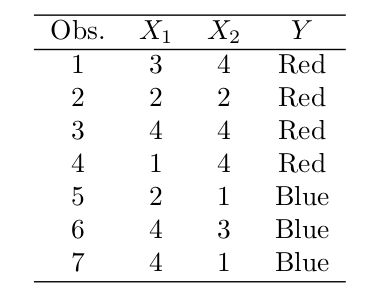

   sketch the observations.

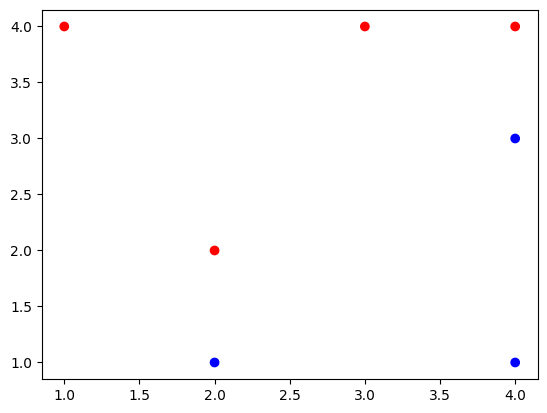

In [37]:
x1 = np.array([3, 2, 4, 1, 2, 4, 4])
x2 = np.array([4, 2, 4, 4, 1, 3, 1])
y = ['red']*4 + ['blue']*3

fig = plt.figure(); ax = fig.add_subplot()
ax.scatter(x1, x2, c=y)

(b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1))

In [38]:
x = np.hstack([x1.reshape(-1, 1), x2.reshape(-1, 1)])
model = SVC(kernel='linear',
            C=1e11).fit(x, y)

display(Markdown(
   rf"""
Hyperplane equation: ${model.intercept_[0]} {model.coef_[0][0]}X_1 + {model.coef_[0][1]}X_2=0$
"""))


Hyperplane equation: $0.9997070312500025 -1.9994140625000014X_1 + 1.9994140625000014X_2=0$


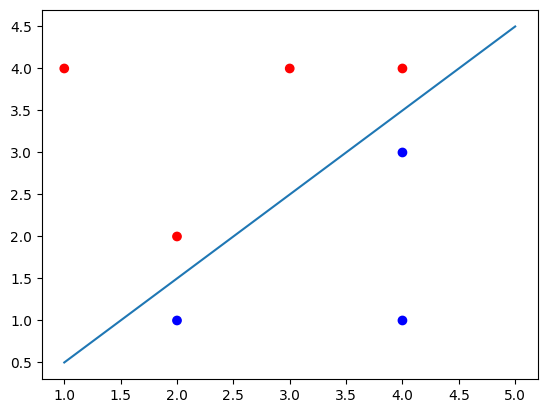

In [39]:
w = model.coef_[0]
a = -w[0] / w[1]
x1_hyperplane = np.linspace(1, 5)
x2_hyperplane = a * x1_hyperplane - (model.intercept_[0]) / w[1]
ax.plot(x1_hyperplane, x2_hyperplane)

fig

(c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of "Classify to Red if $\beta_0+\beta_1X_1+\beta_2X_2 > 0$ and classify to Blue otherwise". Provide the values for $\beta_0$,  $\beta_1$,  $\beta_2$.

If we replace the coordinates of the hyperplane equation above, the point will fall into the red class if the result is higher than 0 and into the blue class if the result is lower than 0.

(d) On your sketch, indicate the margin for the maximal margin hyperplane.

(e) Indicate the support vectors for the maximal margin classifier.

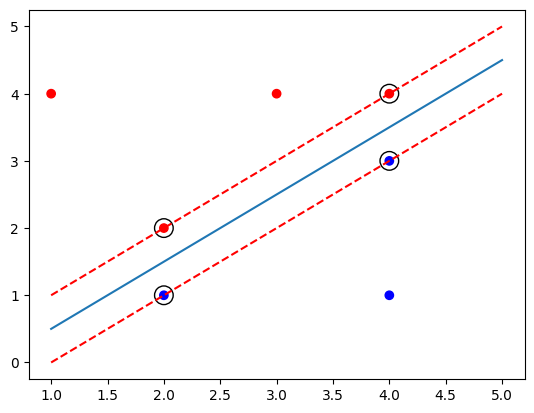

In [40]:
x2_margin_up = (1-model.intercept_[0] - x1_hyperplane*w[0])/w[1]
x2_margin_down = (-1-model.intercept_[0] - x1_hyperplane*w[0])/w[1]

ax.plot(x1_hyperplane, x2_margin_up, 'r--')
ax.plot(x1_hyperplane, x2_margin_down, 'r--')

support_vectors = model.support_vectors_
ax.scatter(support_vectors[:, 0],
           support_vectors[:, 1],
           s=180, facecolors='none', edgecolors='black')
           
fig

(f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

In [41]:
x[6]

array([4, 1])

This particular point is situated at the biggest distance to the hyperplane. It will probably not have much of an effect. It is not a support vector.

(g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.


Hyperplane equation: $-0.7999999999999999 -0.09999999999999998X_1 + 0.5X_2=0$


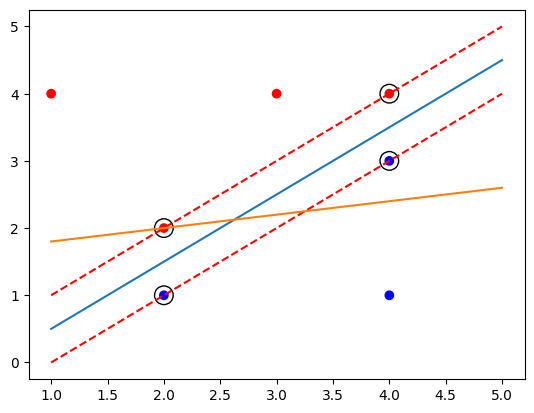

In [42]:
x = np.hstack([x1.reshape(-1, 1), x2.reshape(-1, 1)])
model = SVC(kernel='linear',
            C=0.1).fit(x, y)

display(Markdown(
   rf"""
Hyperplane equation: ${model.intercept_[0]} {model.coef_[0][0]}X_1 + {model.coef_[0][1]}X_2=0$
"""))

w = model.coef_[0]
a = -w[0] / w[1]
x1_suboptimal_hyperplane = np.linspace(1, 5)
x2_suboptimal_hyperplane = a * x1_hyperplane - (model.intercept_[0]) / w[1]
ax.plot(x1_suboptimal_hyperplane, x2_suboptimal_hyperplane)

fig

(h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.


Hyperplane equation: $-4.999050189886451 -0.49989823438227177X_1 + 1.999592938926071X_2=0$


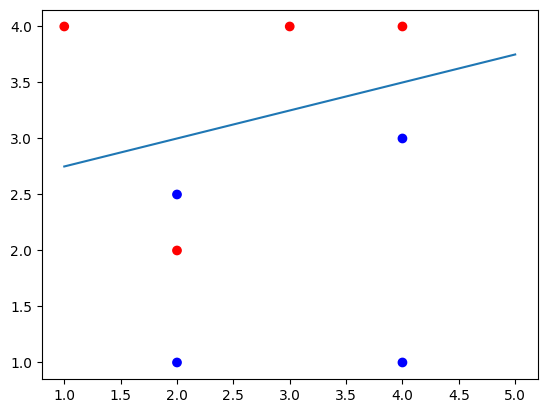

In [43]:
x = np.vstack([x, [2, 2.5]])
y += ['blue']

model = SVC(kernel='linear',
            C=1e6).fit(x, y)

display(Markdown(
   rf"""
Hyperplane equation: ${model.intercept_[0]} {model.coef_[0][0]}X_1 + {model.coef_[0][1]}X_2=0$
"""))

fig = plt.figure(); ax = fig.add_subplot()
w = model.coef_[0]
a = -w[0] / w[1]
x1_hyperplane = np.linspace(1, 5)
x2_hyperplane = a * x1_hyperplane - (model.intercept_[0]) / w[1]
ax.scatter(x[:, 0], x[:, 1], c=y)
ax.plot(x1_hyperplane, x2_hyperplane)

# Applied

4. Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two clsses. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

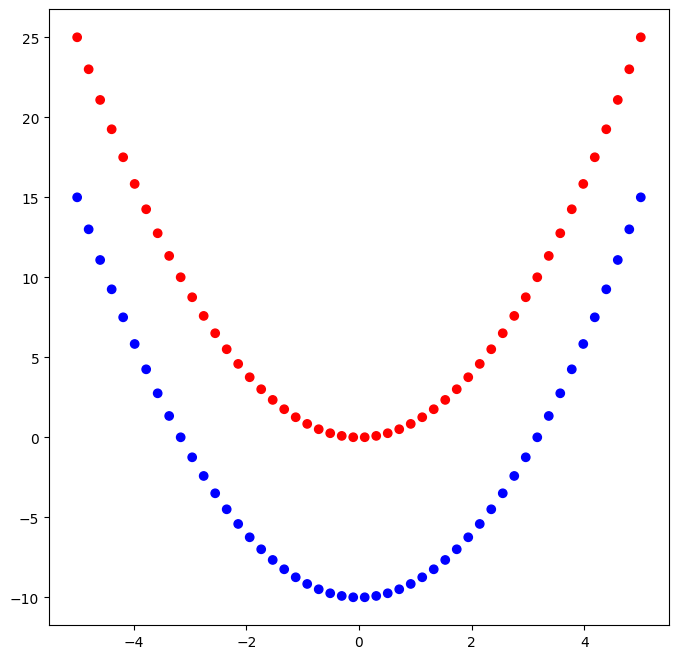

In [44]:
x = np.zeros((100, 2))
x[:50, 0] = np.linspace(-5, 5, 50)
x[:50:, 1] = x[:50, 0]**2
x[50:, 0] = np.linspace(-5, 5, 50)
x[50::, 1] = x[:50, 0]**2 - 10
y = ['red'] * 50 + ['blue'] * 50
X_train, X_test, Y_train, Y_test = skm.train_test_split(x, y, random_state=0, test_size=0.5)


fig = plt.figure(figsize=(8,8)); ax = fig.add_subplot()
ax.scatter(x[:, 0],
           x[:, 1],
           c=y)

In [45]:
svc_poly = SVC(kernel='poly',
               degree=3,
               C=1e5).fit(X_train, Y_train)
svc_linear = SVC(kernel='linear',
                 C=1e5).fit(X_train, Y_train)
svc_radial = SVC(kernel='rbf',
                 C=1e5).fit(X_train, Y_train)

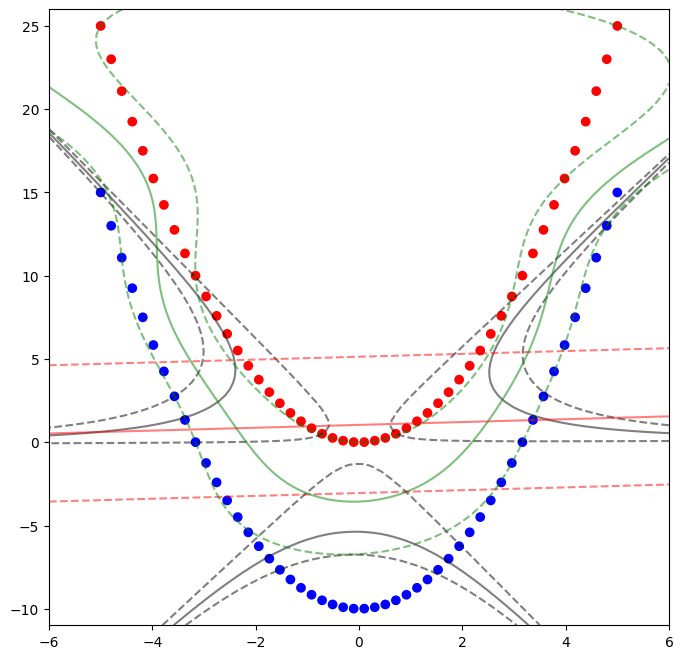

In [46]:
from sklearn.inspection import DecisionBoundaryDisplay

for classifier, color, label in zip([svc_poly, svc_linear, svc_radial],
                                    ['k', 'r', 'g'],
                                    ['Polynomial decision boundary',
                                     'Linear decision boundary',
                                     'Radial decision boundary']):
    DecisionBoundaryDisplay.from_estimator(
        classifier,
        x,
        response_method='decision_function',
        plot_method='contour',
        colors=color,
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=['--', '-', '--'],
        ax=ax)
    
fig

We can see that the radial classifier performs best, correctly separating every class.

In [47]:
# Test error
for classifier in [svc_linear, svc_poly, svc_radial]:
    pred = classifier.predict(X_test)
    print('accuracy:', np.mean(Y_test == pred))

accuracy: 0.74
accuracy: 0.86
accuracy: 1.0


In [48]:
# Train error
for classifier in [svc_linear, svc_poly, svc_radial]:
    pred = classifier.predict(X_train)
    print('accuracy:', np.mean(Y_train == pred))

accuracy: 0.7
accuracy: 0.78
accuracy: 1.0


5. We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also botain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

   (a) Generate a data set with n=500 and p=2, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:

In [49]:
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
y = x1**2 - x2**2 > 0
y = np.where(y==True, 1, 0)
x = np.hstack((x1[:, None], x2[:, None]))
df = pd.DataFrame(np.hstack([x, y[:, None]]), columns=['x1', 'x2', 'y'])

(b) Plot the observations, colored according to their class labels. Your plot should display $X_1$ on the x-axis, and $X_2$ on the y-axis.

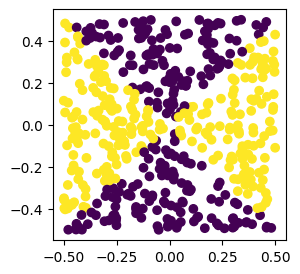

In [50]:
fig = plt.figure(figsize=(3, 3)); ax = fig.add_subplot()
ax.scatter(x1,
           x2,
           c=y)

(c) Fit a logistic regression model to the data, using $X_1$ and $X_2$ as predictors.

In [51]:
X_train, X_test, Y_train, Y_test = skm.train_test_split(df.loc[:, ['x1', 'x2']], df['y'], test_size=0.5, random_state=0)
model = sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()

(d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

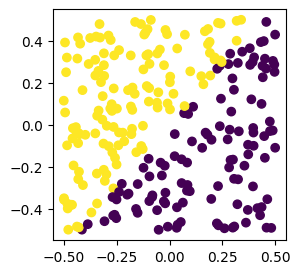

In [52]:
pred = np.where(model.predict(X_train) > 0.5, 1, 0)
fig = plt.figure(figsize=(3, 3)); ax = fig.add_subplot()
ax.scatter(X_train['x1'],
           X_train['x2'],
           c=pred)

(e) Now fit a logistic regression model to the data using non-linear functions of $X_1$ and $X_2$ as predictors(e.g. $X_1^2$, $X_1 * X_2$, $log(X_2)$, and so forth).

(f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear.

/home/alex/mambaforge/envs/stats/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/alex/mambaforge/envs/stats/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/alex/mambaforge/envs/stats/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/alex/mambaforge/envs/stats/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/alex/mambafor

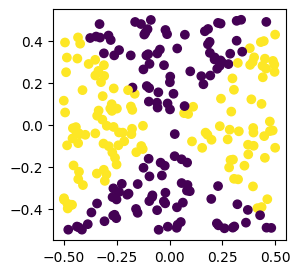

In [53]:
squared_model = smf.glm('y ~ x1 + x2 + np.square(x1) + np.square(x2)',
                        data=pd.concat([X_train, Y_train], axis='columns'),
                        family=sm.families.Binomial())
squared_model = squared_model.fit()


pred = np.where(squared_model.predict(X_train) > 0.5, 1, 0)
fig = plt.figure(figsize=(3, 3)); ax = fig.add_subplot()
ax.scatter(X_train['x1'],
           X_train['x2'],
           c=pred)

(g) Fit a support vector classifier to the data with $X_1$ and $X_2$ as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

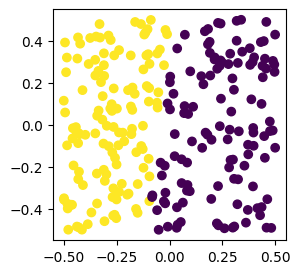

In [54]:
model_svc = SVC(kernel='linear',
                C=1e5).fit(X_train, Y_train)

pred = np.where(model_svc.predict(X_train) > 0.5, 1, 0)
fig = plt.figure(figsize=(3, 3)); ax = fig.add_subplot()
ax.scatter(X_train['x1'],
           X_train['x2'],
           c=pred)

(h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

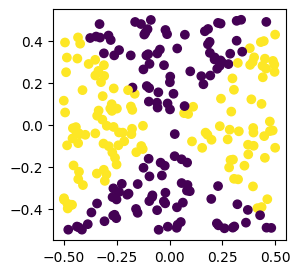

In [55]:
model_svc = SVC(kernel='poly',
                degree=2,
                C=1e5).fit(X_train, Y_train)

pred = np.where(model_svc.predict(X_train) > 0.5, 1, 0)
fig = plt.figure(figsize=(3, 3)); ax = fig.add_subplot()
ax.scatter(X_train['x1'],
           X_train['x2'],
           c=pred)

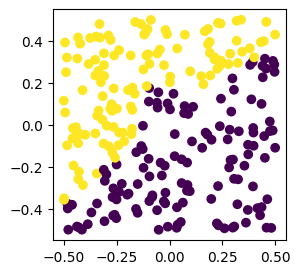

In [56]:
model_svc = SVC(kernel='poly',
                degree=3,
                C=1e5).fit(X_train, Y_train)

pred = np.where(model_svc.predict(X_train) > 0.5, 1, 0)
fig = plt.figure(figsize=(3, 3)); ax = fig.add_subplot()
ax.scatter(X_train['x1'],
           X_train['x2'],
           c=pred)

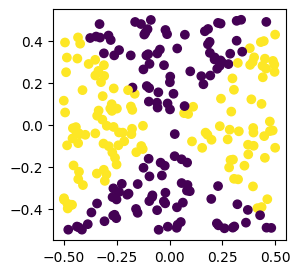

In [57]:
model_svc = SVC(kernel='rbf',
                C=1e5).fit(X_train, Y_train)

pred = np.where(model_svc.predict(X_train) > 0.5, 1, 0)
fig = plt.figure(figsize=(3, 3)); ax = fig.add_subplot()
ax.scatter(X_train['x1'],
           X_train['x2'],
           c=pred)

(i) Comment on your results.

Both rbf and poly with d=2 perform well.

6. At the end of Section 9.6.1, it is claimed that in the case of data that is just barely linearly separable, a support vector classifier with a small value of C that misclassifies a couple of training observations may perform better on test data than one with a huge value of C that does not misclassify any training observations. You will now investigate this claim.

(a) Generate two-class data with p=2 in such a way that the classes are just barely linearly separable.

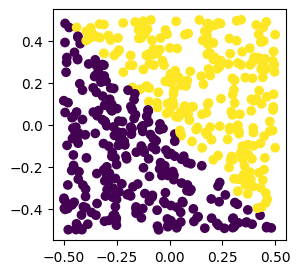

In [58]:
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
y = x1 + x2 > 0
y = np.where(y==True, 1, 0)
x = np.hstack((x1[:, None], x2[:, None]))
df = pd.DataFrame(np.hstack([x, y[:, None]]), columns=['x1', 'x2', 'y'])
X_train, X_test, Y_train, Y_test = skm.train_test_split(df.loc[:, ['x1', 'x2']], df['y'], test_size=0.5, random_state=0)


fig = plt.figure(figsize=(3, 3)); ax = fig.add_subplot()
ax.scatter(df['x1'],
           df['x2'],
           c=y)

(b) Compute the cross-validation error rates for support vector classifiers with a range of C values. How many training observations are misclassified for each value of C considered, and how does this relate to the cross-validation error rates obtained?

In [59]:
c_range = np.logspace(-10, 10, 200, base=10)
param_grid = {'C': c_range}
kfold = skm.KFold(n_splits=5,
                  shuffle=True,
                  random_state=0)
grid = skm.GridSearchCV(SVC(kernel='linear'),
                        param_grid,
                        scoring='accuracy',
                        cv=kfold).fit(X_train, Y_train)
grid.best_params_

{'C': 72.32633896483549}

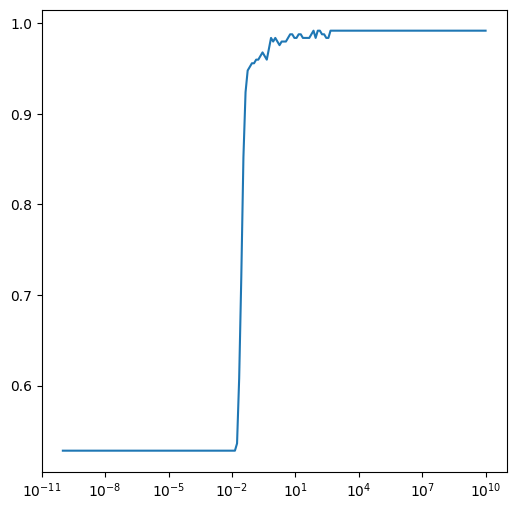

In [60]:
fig = plt.figure(figsize=(6, 6)); ax = fig.add_subplot()
ax.plot(c_range,
        grid.cv_results_['mean_test_score'],
        label='training cv')
ax.set_xscale('log')

{'C': 1162.3224686798542}

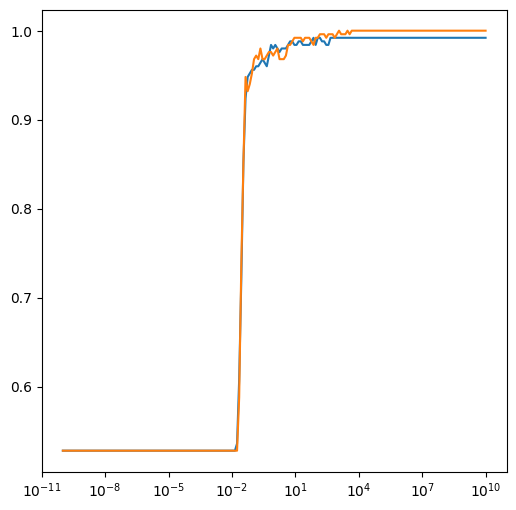

In [61]:
grid = skm.GridSearchCV(SVC(kernel='linear'),
                        param_grid,
                        scoring='accuracy',
                        cv=None).fit(X_train, Y_train)
ax.plot(c_range,
        grid.cv_results_['mean_test_score'],
        label='training accuracy')
display(grid.best_params_)
fig

(c) Generate an appropriate test data set, and compute the test errors corresponding to each of the values of C considered. Which value of C leads to the fewest test errors, and how does this compare to the values of C that yield the fewest training errors and the fewest cross-validation errors?

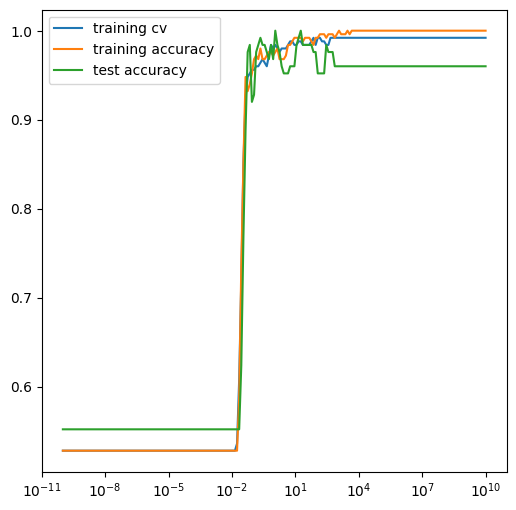

In [62]:
shuffle_split = skm.ShuffleSplit(n_splits=1,
                                 test_size=0.5,
                                 random_state=0)
grid = skm.GridSearchCV(SVC(kernel='linear'),
                        param_grid,
                        scoring='accuracy',
                        cv=shuffle_split).fit(X_train, Y_train)
ax.plot(c_range,
        grid.cv_results_['mean_test_score'],
        label='test accuracy')
ax.legend()
fig

In [63]:
grid.best_params_

{'C': 1.122667773510816}

(d) Discuss your results.

The C values differ a lot between each other.

7. In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.

(a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [64]:
Auto = load_data('Auto')
Auto['mpg_bool'] = np.where(Auto['mpg'] > Auto['mpg'].median(), 1, 0)

(b) Fit a support vector classifier to the data with various values of C, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results. Note you will need to fit the classifier without the gas mileage variable to produce sensible results.

In [65]:
c_range = np.logspace(-2, 2, 10, base=10)
param_grid = {'C': c_range}

X = Auto.drop(columns=['mpg', 'name', 'mpg_bool'])
y = Auto['mpg_bool']
classifier_linear = SVC(kernel='linear')
grid_linear = skm.GridSearchCV(classifier_linear,
                        param_grid,
                        cv=kfold,
                        scoring='accuracy').fit(X, y)

grid_linear.best_params_, grid_linear.best_score_

({'C': 0.01}, 0.9159039272963325)

Text(0, 0.5, 'Accuracy score')

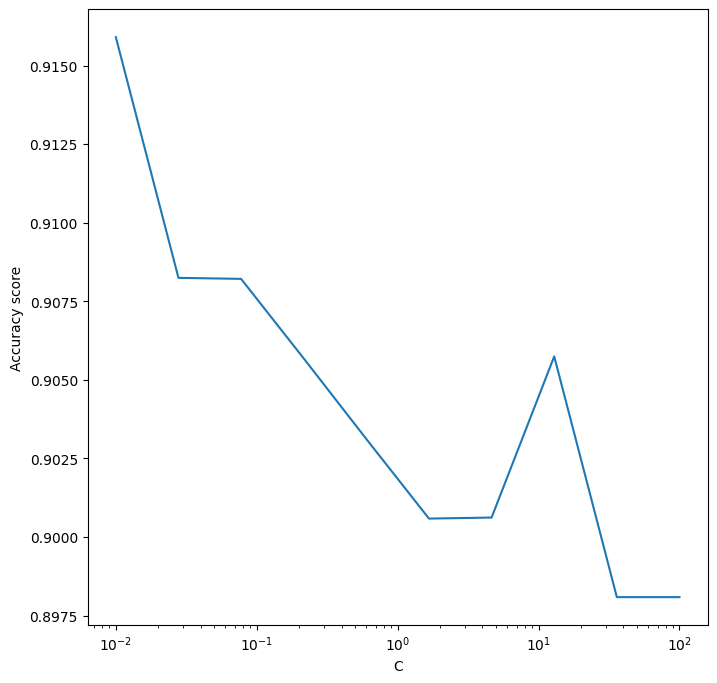

In [66]:
fig = plt.figure(figsize=(8, 8)); ax = fig.add_subplot()
ax.plot(c_range,
        grid_linear.cv_results_['mean_test_score'],
        label='Linear')
ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('Accuracy score')

We can see here that a model with more bias (less restrictive hyperplane) performs better.

(c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and C. Comment on your results.

(d) Make some plots to back up your assertions in (b) and (c).

#### Polynomial

In [67]:
param_grid = {'C': c_range,
              'degree': [2, 3]}
classifier_poly = SVC(kernel='poly')
grid_poly = skm.GridSearchCV(classifier_poly,
                        param_grid,
                        cv=kfold,
                        scoring='accuracy').fit(X, y)

display(grid_poly.best_params_, grid_poly.best_score_)

for degree in [2, 3]:
    mask = grid_poly.cv_results_['param_degree'] == degree
    ax.plot(c_range,
            grid_poly.cv_results_['mean_test_score'][mask],
            label=f'Polynomial Degree {degree}')

{'C': 100.0, 'degree': 2}

0.8979876663420967

{'C': 35.93813663804626, 'gamma': 0.0001}

0.9005517689061995

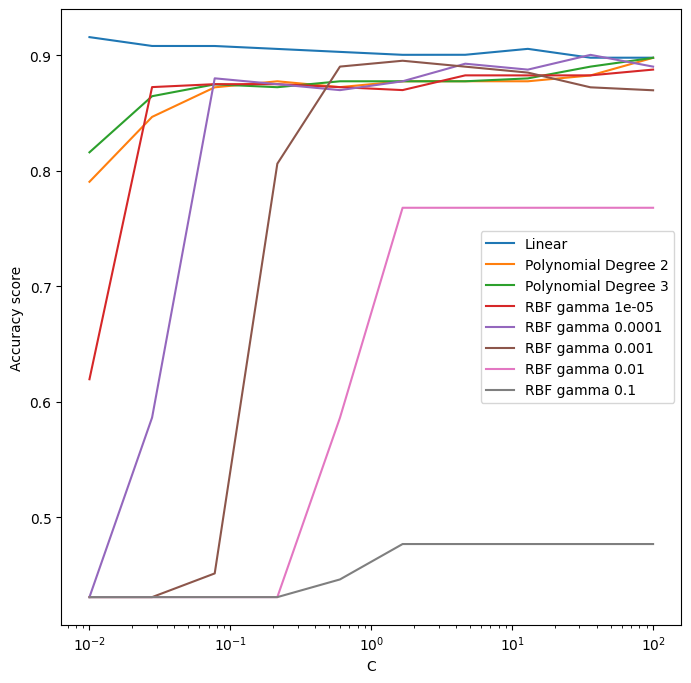

In [68]:
gamma_range = [0.00001, 0.0001, 0.001, 0.01, 0.1]
param_grid = {'C': c_range,
              'gamma': gamma_range}
classifier_rbf = SVC(kernel='rbf')
grid_rbf = skm.GridSearchCV(classifier_rbf,
                        param_grid,
                        cv=kfold,
                        scoring='accuracy').fit(X, y)

display(grid_rbf.best_params_, grid_rbf.best_score_)

for gamma in gamma_range:
    mask = grid_rbf.cv_results_['param_gamma'] == gamma
    ax.plot(c_range,
            grid_rbf.cv_results_['mean_test_score'][mask],
            label=f'RBF gamma {gamma}')
ax.legend()
fig

In [69]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
forward_selector = SequentialFeatureSelector(log_reg,
                                             n_features_to_select=2,
                                             scoring='accuracy',
                                             cv=kfold,
                                             direction='forward').fit(X, y)
selected_features_mask = forward_selector.support_
selected_features_idx = [idx for idx, bool in enumerate(selected_features_mask) if bool]
X_forward_selected = X.loc[:, selected_features_mask]

/home/alex/mambaforge/envs/stats/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/alex/mambaforge/envs/stats/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/alex/mambaforge/envs/stats/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


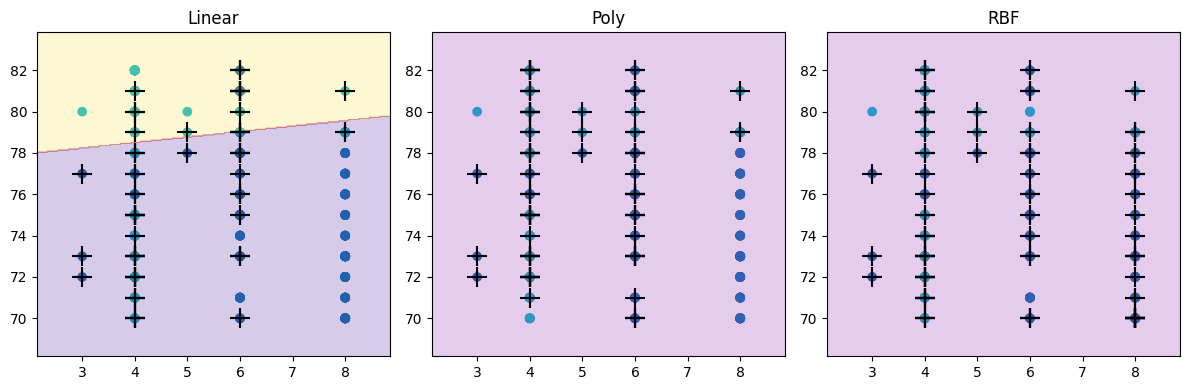

In [70]:
fig = plt.figure(figsize=(12,4))

for model, label, idx in zip([grid_linear.best_estimator_, grid_poly.best_estimator_, grid_rbf.best_estimator_],
                             ['Linear', 'Poly', 'RBF'],
                             range(1, 4)):
    ax = fig.add_subplot(1, 3, idx)
    plot = plot_svm(X,
                     y,
                     model,
                     features=(selected_features_idx[0],
                               selected_features_idx[1]),
                     ax=ax)
    title = ax.set_title(label)
fig.tight_layout()

8. This problem involves the OJ data set which is part of the ISLP package.

In [71]:
OJ = load_data('OJ')
OJ['Purchase'] = OJ['Purchase'].astype('category')
OJ['Store7'] = np.where(OJ['Store7'] == 'Yes', 1, 0)

(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [72]:
X_train, X_test, Y_train, Y_test = skm.train_test_split(OJ.drop(columns='Purchase'), OJ['Purchase'].astype('category'), train_size=800, random_state=0)

(b) Fit a support vector classifier to the training data using C = 0.01, with Purchase as the response and the other variables as the predictors. How many support points are there?

In [73]:
svc = SVC(C=0.01,
          kernel='linear').fit(X_train, Y_train)
svc.n_support_

array([302, 300], dtype=int32)

(c) What are the training and test error rates?

In [74]:
# Training accuracy
print((svc.predict(X_train) == Y_train).mean())

# Test accuracy
print((svc.predict(X_test) == Y_test).mean())

0.71625
0.6777777777777778


(d) Use cross-validation to select an optimal C. Consider values in the range 0.01 to 10.

In [75]:
svc = SVC(C=0.01,
          kernel='linear')
c_range = [0.01, 0.1, 1]
param_grid = {'C': c_range}
grid = skm.GridSearchCV(svc,
                        param_grid,
                        scoring='accuracy',
                        cv=kfold).fit(X_train, Y_train)
grid.best_params_

{'C': 1}

(e) Compute the training and test error rates using this new value for C.

In [76]:
# Training accuracy
print((grid.best_estimator_.predict(X_train) == Y_train).mean())

# Test accuracy
print((grid.best_estimator_.predict(X_test) == Y_test).mean())

0.84
0.8222222222222222


(f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for gamma.

In [77]:
svc = SVC(C=0.01,
          kernel='rbf').fit(X_train, Y_train)
svc.n_support_

print('---- Without gridsearch CV ----')
# Training accuracy
print((svc.predict(X_train) == Y_train).mean())

# Test accuracy
print((svc.predict(X_test) == Y_test).mean())

svc = SVC(C=0.01,
          kernel='rbf')
c_range = [0.01, 0.1, 1]
param_grid = {'C': c_range}
grid = skm.GridSearchCV(svc,
                        param_grid,
                        scoring='accuracy',
                        cv=kfold).fit(X_train, Y_train)
grid.best_params_


print('---- With gridsearch CV ----')
# Training accuracy
print((grid.best_estimator_.predict(X_train) == Y_train).mean())

# Test accuracy
print((grid.best_estimator_.predict(X_test) == Y_test).mean())

---- Without gridsearch CV ----
0.625
0.5666666666666667
---- With gridsearch CV ----
0.625
0.5666666666666667


(g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree = 2.

In [78]:
svc = SVC(C=0.01,
          kernel='poly',
          degree=2).fit(X_train, Y_train)
svc.n_support_

print('---- Without gridsearch CV ----')
# Training accuracy
print((svc.predict(X_train) == Y_train).mean())

# Test accuracy
print((svc.predict(X_test) == Y_test).mean())

svc = SVC(C=0.01,
          kernel='poly',
          degree=2)
c_range = [0.01, 0.1, 1]
param_grid = {'C': c_range}
grid = skm.GridSearchCV(svc,
                        param_grid,
                        scoring='accuracy',
                        cv=kfold).fit(X_train, Y_train)
grid.best_params_


print('---- With gridsearch CV ----')
# Training accuracy
print((grid.best_estimator_.predict(X_train) == Y_train).mean())

# Test accuracy
print((grid.best_estimator_.predict(X_test) == Y_test).mean())

---- Without gridsearch CV ----
0.625
0.5666666666666667
---- With gridsearch CV ----
0.625
0.5666666666666667


(h) Overall, which approach seems to give the best results on this data?

The support vector classifier outperform the two kernel transformations.

In [17]:
import pandas as pd

pd.Series(['a', 'aa', 'aaa', 'aaaa']).

'aaaa'